In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [28]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca, filter_data_labels
from src.concept_vectors import *
from src.util import *
import seaborn as sns
from src.dataset import get_cub_attributes 

In [6]:
cub_attributes = get_cub_attributes()

## Retrieve CEM Concept Vectors

In [8]:
concept_vectors = []
concept_metadata = []

In [10]:
for i in range(len(cub_attributes)):
    cem_vectors = list(load_cem_vectors("cub",i))
    concept_vectors+=cem_vectors
    concept_metadata+=[{'concept': cub_attributes[i]} for j in range(len(cem_vectors))]
concept_vectors = np.array(concept_vectors)

In [12]:
label_by_concept = [i['concept'] for i in concept_metadata]

#### As there are too many concepts to visualize all at once, visualize a subset of related concepts, and see what patterns emerge

In [20]:
filter_only_bill_shape = lambda label: 'bill' in label

Text(27.0, 0.5, 'Axis 2')

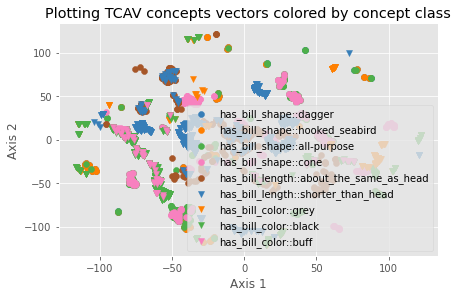

In [22]:
plt.title("Plotting CEM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors,label_by_concept,filter_labels=filter_only_bill_shape)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

In [29]:
bill_shape_concepts, bill_shape_labels = filter_data_labels(concept_vectors,label_by_concept,filter_only_bill_shape)

Text(0.5, 1.0, 'Heatmap of average cosine distances between Bird attributes relating to bill shape, in Latent space')

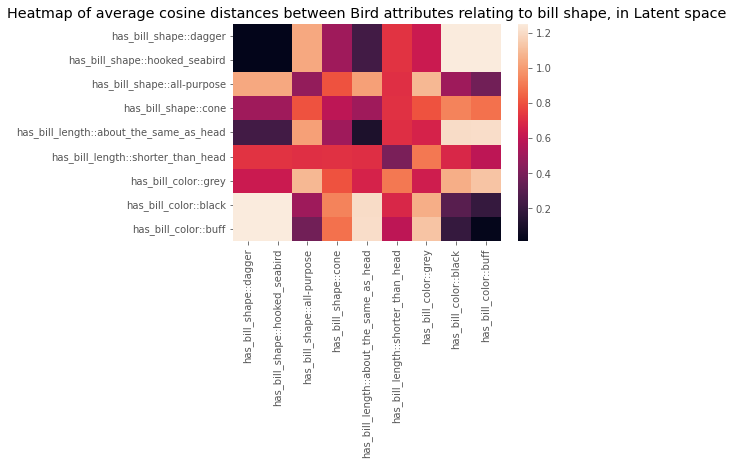

In [30]:
cosine_by_class_raw = find_average_distances(bill_shape_concepts,encode_list(bill_shape_labels),cosine_metric=True)
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(bill_shape_labels),
            yticklabels=find_unique_in_order(bill_shape_labels))
plt.title("Heatmap of average cosine distances between Bird attributes relating to bill shape, in Latent space")